# Adult Classification

## Description

In this project, we have data that represents a population with different demographic characteristics, following by their economic and social status.  
We are going to investigate the data and try to use supervised machine learning algorithms to find a relationship between the different features and the income of the person.

### Data

The data is taken from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).  
The data is split into two files: `adult.data` and `adult.test`, within the data folder. (currently not in the repo because of the size of the files)  
The data is in CSV format, with 14 features plus the target feature.
Here's the link to the [train](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) and [test](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test) data.

### Goal

The goal is to predict whether a person makes over 50K a year, based on the other features.

### Analysis

The process of the analysis is as follows:

1. Data exploration
2. Data cleaning
3. Feature engineering and Preprocessing
4. Model selection
5. Model evaluation

## Load Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (5, 5)

In [2]:
# load datasets
data = pd.read_csv('../data/adult.data', delimiter=', ', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'], engine='python')

test = pd.read_csv('../data/adult.test', delimiter=', ', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'], skiprows=1, engine='python')

In [3]:
# handle inconsistent labels of income
test['income'] = test['income'].apply(lambda x: x.replace('.', ''))

In [4]:
adults = pd.concat([data, test], axis=0)

In [5]:
# inspect data
print(adults.shape)
adults.head()

(48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Our dataset is quite large, we need to look at the data type of each column and the number of missing values.


In [6]:
# inspect data types
adults.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

It seems that the types are correctly assigned.

In [7]:
# inspect missing values
adults.isna().sum().sort_values()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Looks like there are no missing values, not at least those represented as Nan, we might have some missing values represented differently.  
We could group our features into three groups:

- demographic features
    - age
    - race
    - sex  
- economic features
    - education
    - education-num
    - occupation
    - hours-per-week
    - capital-gain
    - capital-loss  
- social features
    - fnlwgt
    - martial-status
    - relationship
    - native-country

## Explore Data

Let's start with an overview of summary statistics of the numerical features.

In [8]:
# summary statistics
adults.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


It doesn't seem like there are any outliers in the data, but we can't be sure without looking at the distribution of the data.

Let's start off with the distribution of the age, and the histogram shows us that the age impacts the type of income.

<AxesSubplot: xlabel='age', ylabel='Count'>

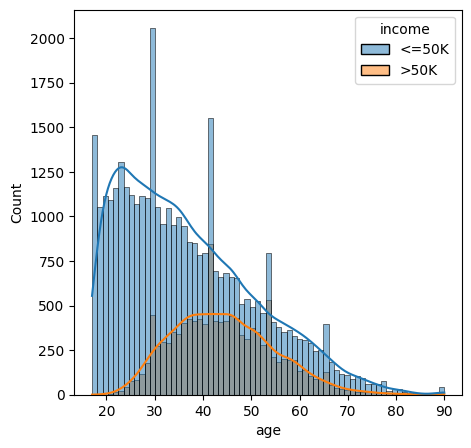

In [9]:
# histogram of age
sns.histplot(data=adults, x='age', hue='income', kde=True)

In the following graph, we see that the proportion of males is twice the proportion of females.

Text(0.5, 0, '')

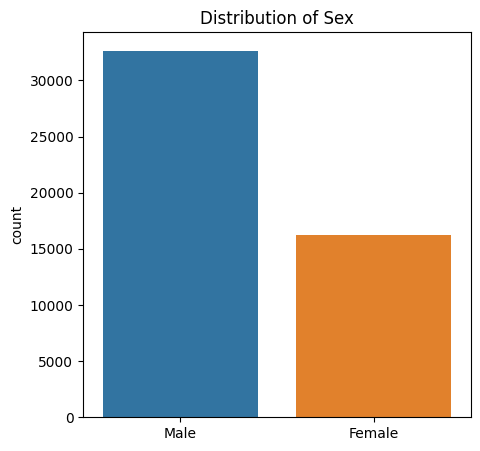

In [10]:
# distribution of sex
sns.countplot(data=adults, x='sex')
plt.title('Distribution of Sex')
plt.xlabel('')

Next, we see that the vast majority of the population is white. with a significatively high proportion. This leads to the conlusion that race isn't a good feature to use in our model, it doesn't add enough information.

Text(0.5, 1.0, 'Distribution of Race')

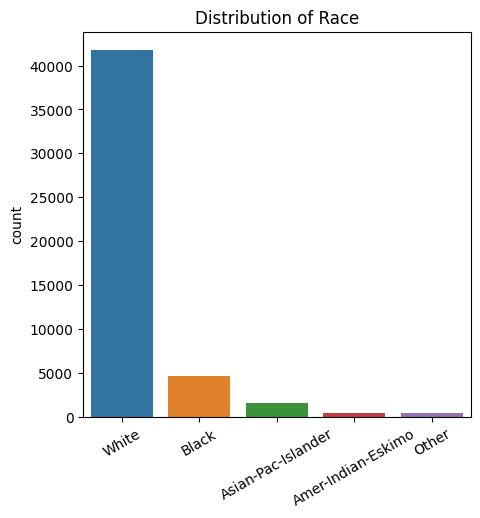

In [11]:
# distribution of race
sns.countplot(data=adults, x='race')
plt.xticks(rotation=30)
plt.xlabel('')
plt.title('Distribution of Race')

The following graph emphasizes the fact that race isn't useful in explaining the income of a person.

Text(0.5, 1.0, 'Race across Income')

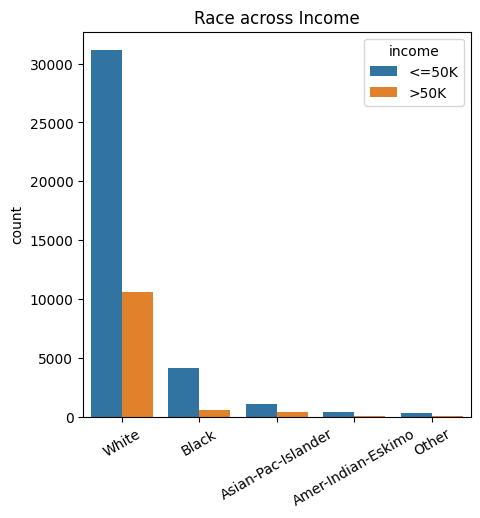

In [12]:
# distribution race across income
sns.countplot(data=adults, x='race', hue='income')
plt.xticks(rotation=30)
plt.xlabel('')
plt.title('Race across Income')

The next thing we do is performing an chi-square test to look at the association between education and education-num.  
The test shows that the two features are perfectly associated, so we can drop one of them as it represents the same information.

In [13]:
# relationship between education and education-num
from scipy.stats import chi2_contingency

Xtab = pd.crosstab(adults['education'], adults['education-num'])
chi2, pval, dof, expected = chi2_contingency(Xtab)
print(chi2, pval)

732630.0 0.0


After trying to investigate the relationship between education level and income level, we see that there is a very strong relationship between the two. More over, we see that the column that we have kept is education-num rather than education, because education-num is a numerical representation of the education level, so it'll keep the order of the education levels that impact income significantly as they get higher.

In [14]:
# relationship between education and income
# get the count of each eduction level and income level
df = adults.groupby(['education-num', 'income']).size().reset_index(name='count')

# get the percentage of each income level for each education level
df['percentage'] = np.round(df['count'] / df.groupby('education-num')['count'].transform('sum'), 3)
df.head()

,education-num,income,count,percentage
0,1,<=50K,82,0.988
1,1,>50K,1,0.012
2,2,<=50K,239,0.968
3,2,>50K,8,0.032
4,3,<=50K,482,0.947


Text(0.5, 1.0, 'Education across Income')

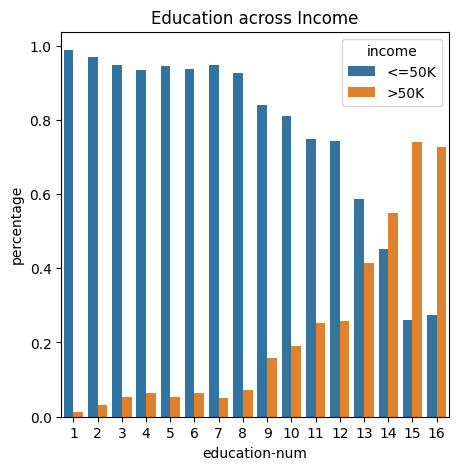

In [15]:
sns.barplot(data=df, x='education-num', y='percentage', hue='income')
plt.title('Education across Income')

As of the workclass feature, we see that there are some missing values represented with a '?', but we can't be sure if they are missing at random or not.  
The vast majority of people are working in the private sector.

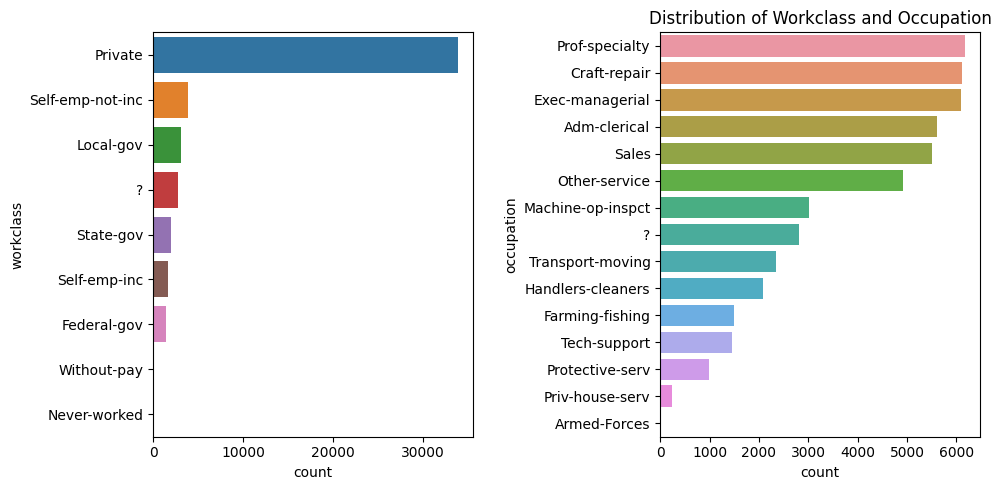

In [16]:
# distribution of workclass and occupation
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=adults, y='workclass', ax=ax[0], order=adults['workclass'].value_counts().index)
sns.countplot(data=adults, y='occupation', ax=ax[1], order=adults['occupation'].value_counts().index)
plt.title('Distribution of Workclass and Occupation')
plt.tight_layout()

The next table shows that the missing values for the feature workclass are almost perfectly associated with missing values for the feature occupation.  
The chi square test shows us that the two features are associated, we can drop one of the columns.  
After separating our dataset on two parts, one in which the workclass and occupation are missing and the other in which they aren't, we saw in the histogram of age across income, that individuals with missing values have almost the same probability of having an income higher or lower than 50k, which is not the case with the other individuals from the second part of the dataset, this leads us to the conclusion that the missing values have an impact on the type of income, so we can't drop them, we can consider them as another class that we can call 'Unknown', and include in whatever model we try to work on.

In [17]:
# cross tabulation on workclass and occupation
workclass_occupation_cross = pd.crosstab(adults['workclass'], adults['occupation'])
workclass_occupation_cross

occupation,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
workclass,,,,,,,,,,,,,,,
?,2799,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Federal-gov,0,487,15,93,268,9,36,19,55,0,253,47,17,96,37
Local-gov,0,421,0,211,331,43,65,24,300,0,1061,450,16,58,156
Never-worked,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Private,0,4208,0,4748,3995,670,1923,2882,4057,242,3409,299,4439,1154,1880
Self-emp-inc,0,47,0,167,617,82,6,17,42,0,245,5,420,9,38
Self-emp-not-inc,0,70,0,798,587,653,21,59,276,0,575,7,591,42,183
State-gov,0,375,0,94,287,25,19,19,191,0,629,175,20,87,60
Without-pay,0,3,0,1,1,8,2,2,2,0,0,0,1,0,1


In [18]:
# chi-square test
chi2, pval, dof, expected = chi2_contingency(workclass_occupation_cross)
chi2, pval

(62533.41790053327, 0.0)

In [19]:
# separating the dataset into two parts
new_adults1 = adults.loc[(adults.workclass == '?') & (adults.occupation == '?')]
new_adults2 = adults.loc[(adults.workclass != '?') & (adults.occupation != '?')]

Text(0.5, 0.98, 'Age across Income for Missing and Non Missing Workclass and Occupation')

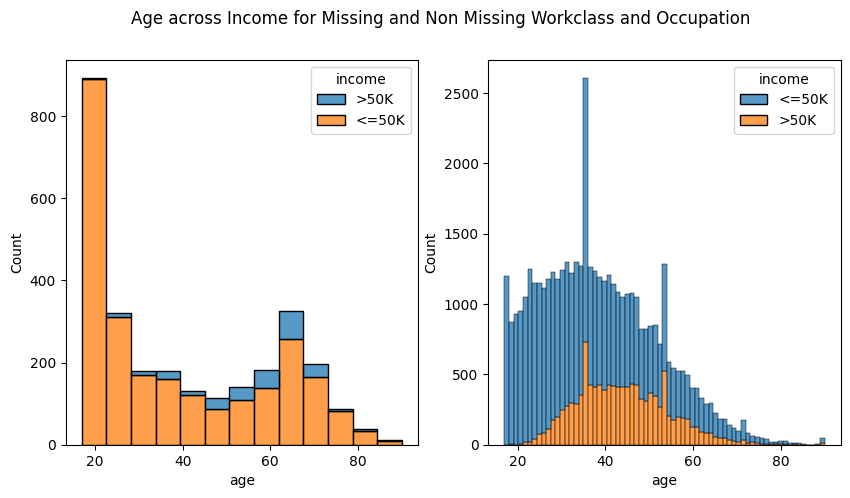

In [20]:
# distribution of age for new df
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=new_adults1, x='age', hue='income', multiple='stack', ax=ax[0])
sns.histplot(data=new_adults2, x='age', hue='income', multiple='stack', ax=ax[1])
plt.suptitle('Age across Income for Missing and Non Missing Workclass and Occupation')

In [21]:
# changing label name for workclass and occupation value of '?' to 'Unknown'
adults.loc[adults.workclass == '?', 'workclass'] = 'Unknown'
adults.loc[adults.occupation == '?', 'occupation'] = 'Unknown'

Next, we see that the vast majority of people are working in the United States, so we can drop this feature as it doesn't add any information.

In [22]:
# country of origin
adults['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

From analyzing the capital-gain and capital-loss features, we see that more than 75% of our data has the value of 0, and the rest corresponds to outliers. However, when we look at the distribution of the other data points that actually doesn't have a null value in either feature, we see that these columns have a little impact on the type of income of the person.  
We might consider dropping these columns.

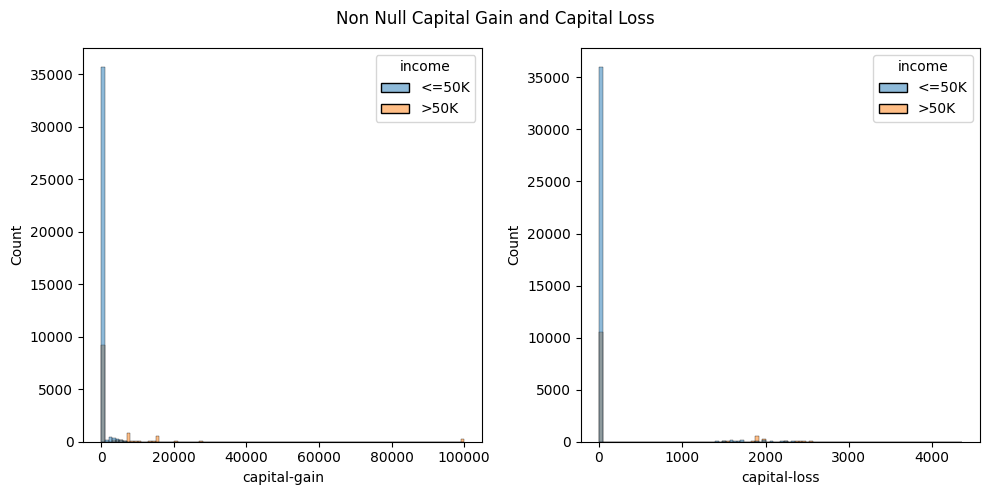

In [23]:
# capital gain and capital loss in subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(data=adults, x='capital-gain', hue='income', ax=ax[0], bins=100)
sns.histplot(data=adults, x='capital-loss', hue='income', ax=ax[1], bins=100)
plt.suptitle('Non Null Capital Gain and Capital Loss')
plt.tight_layout()

Now, examining the fnlwgt column, we see that its distribution is similar across each class of the target feature, meaning that there is no association between the two, we can then drop the fnlwgt feature.

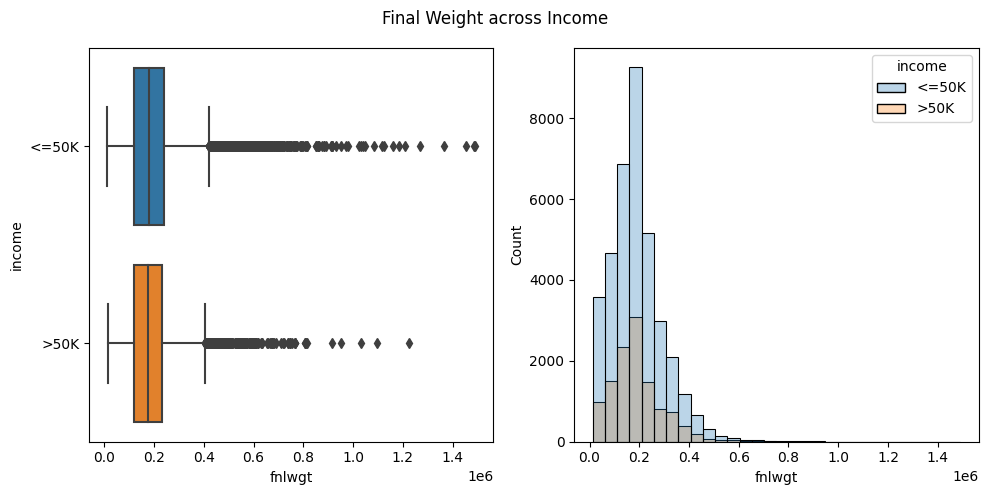

In [24]:
# association between fnlwgt and income
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(data=adults, x='fnlwgt', y='income', ax=ax[0])
sns.histplot(data=adults, x='fnlwgt', hue='income', ax=ax[1], bins=30, alpha=0.3)
plt.suptitle('Final Weight across Income')
plt.tight_layout()

The following test shows that there is no association between the two features, we might consider dropping fnlwgt.

In [25]:
# perform one two samples t-test
from scipy.stats import ttest_ind

# get the samples
sample1 = adults.loc[adults['income'] == '<=50K', 'fnlwgt']
sample2 = adults.loc[adults['income'] == '>50K', 'fnlwgt']

# perform the test
f_stat, pval = ttest_ind(sample1, sample2)
pval

0.16124980594810784

Next, we look at the distribution of marital status and relationship, we see that there might be a relationship between the two categories.  
In addition, looking at these features across the income, we see that these columns have a certain impact on the target feature.

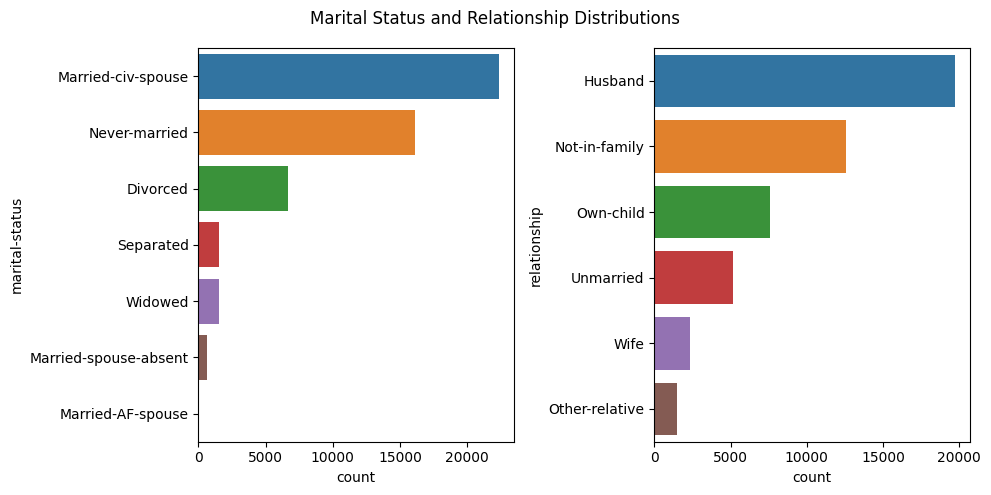

In [26]:
# marital status and relationship
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=adults, y='marital-status', order=adults['marital-status'].value_counts().index, ax=ax[0])
sns.countplot(data=adults, y='relationship', order=adults['relationship'].value_counts().index, ax=ax[1])
plt.suptitle('Marital Status and Relationship Distributions')
plt.tight_layout()

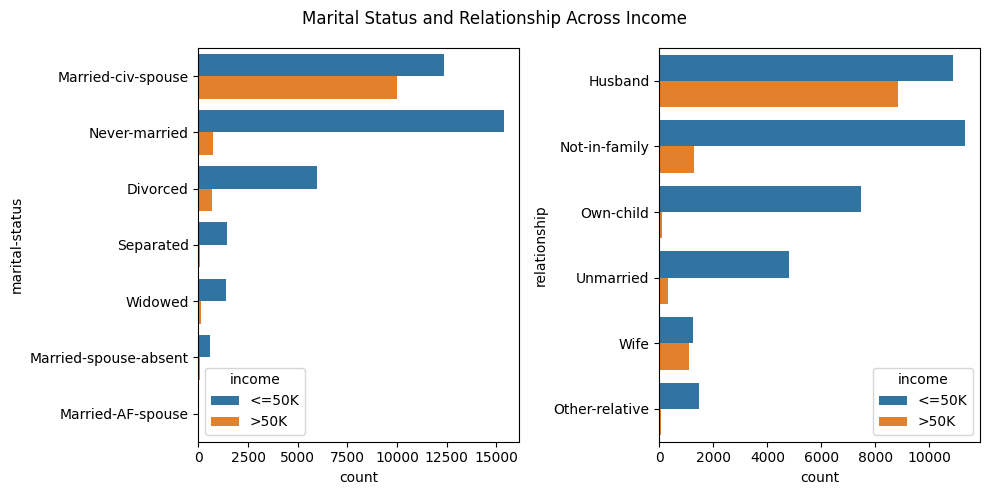

In [27]:
# marital status and relationship
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=adults, y='marital-status', hue='income', order=adults['marital-status'].value_counts().index, ax=ax[0])
sns.countplot(data=adults, y='relationship', hue='income', order=adults['relationship'].value_counts().index, ax=ax[1])
plt.suptitle('Marital Status and Relationship Across Income')
plt.tight_layout()

In order to determine whether any association exists between relationship and marital status, we perform a chi-square test.  
The result of the test shows that there is a strong association between the two features, so we can drop one of them.

In [28]:
# chi-square test
Xtab = pd.crosstab(adults['relationship'], adults['marital-status'])
chi2, pval, dof, expected = chi2_contingency(Xtab)
chi2, pval

(58195.241584154064, 0.0)

## Preprocessing & Feature Engineering

Before we start building our model, we need to preprocess our data, since some models like SVM, KNN and logistic regression require the data to be scaled, and some models like decision trees and random forests don't require scaling.

Note also that we need to encode the categorical features using the one-hot encoding method.

Of course, there are other features that are categorical we talked about dropping, we can still use them in our model and see if the results of the models will be better or not.

First thing, let's create a new column using the marrital-status, we can call it 'family-status', and we can assign the value 'married' to all the individuals that are married, and 'unmarried' to all the individuals that are not married.

In [29]:
# create family-status column
adults['marital-status-reduced'] = adults['marital-status'].replace({'Never-married': 'Unmarried', 'Divorced': 'Unmarried', 'Separated': 'Unmarried', 'Widowed': 'Unmarried', 'Married-civ-spouse': 'Married', 'Married-spouse-absent': 'Married', 'Married-AF-spouse': 'Married'})

Next, let's take a second look at the race column, and see if we can reduce the number of classes, or drop the columnif if there is no information gain.

In [30]:
# change race into white and non-white
adults['race-reduced'] = adults['race'].apply(lambda x: 'White' if x == 'White' else 'Non-White')

The following cross table shows us that white individuals are more likely to have an income higher than 50k than non-white ones, this could be due to the fact that the majority of the population is white, so the proportion of white individuals with an income higher than 50k is higher than the proportion of non-white individuals with an income higher than 50k.  
We can drop the race column.

In [31]:
# proportion of race across income
Xtab = pd.crosstab(adults['race-reduced'], adults['income'], normalize='index')
Xtab

income,<=50K,>50K
race-reduced,,
Non-White,0.847458,0.152542
White,0.746013,0.253987


The final step is looking at the occupation and workclass columns.  
The phenomenon of class imbalance in present in the workclass column, so we can't rely on this feature to build a good model, however, since it's associated with the occupation column, we can use this category instead.  
Let's see if we can reduce the number of classes in the occupation column.

The distribution of occupation across income shows us that we can group the occupations into three groups: 'group1', 'group2' and 'group3'.
'group1' contains the occupations that have a high proportion of individuals with an income higher than 50k, 'group2' contains the occupations that have a medium proportion of individuals with an income higher than 50k, and 'group3' contains the occupations that have a low proportion of individuals with an income higher than 50k.

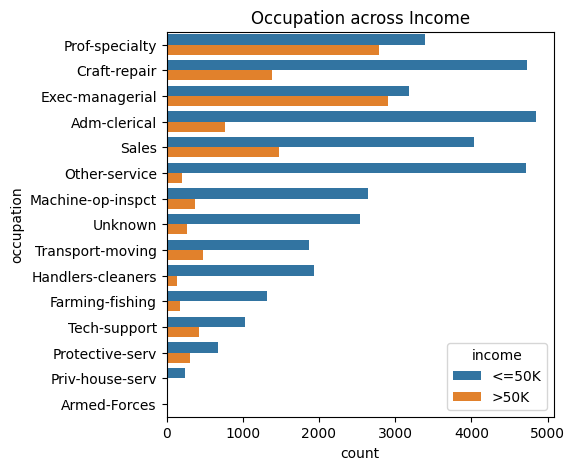

income,<=50K,>50K
occupation,,
Exec-managerial,0.522182,0.477818
Prof-specialty,0.548931,0.451069
Armed-Forces,0.666667,0.333333
Protective-serv,0.686673,0.313327
Tech-support,0.709544,0.290456
Sales,0.732013,0.267987
Craft-repair,0.773724,0.226276
Transport-moving,0.795754,0.204246
Adm-clerical,0.863126,0.136874


In [32]:
# distribution of occupation by income
sns.countplot(data=adults, y='occupation', hue='income', order=adults['occupation'].value_counts().index)
plt.title('Occupation across Income')
plt.show()

# crosstab of occupation and income
Xtab = pd.crosstab(adults['occupation'], adults['income'], normalize='index').sort_values(by='>50K', ascending=False)
Xtab

In [33]:
group_1 = ['Exec-managerial', 'Prof-specialty']
group_2 = ['Protective-serv', 'Tech-support', 'Sales','Craft-repair', 'Transport-moving']
group_3 = ['Adm-clerical', 'Machine-op-inspct', 'Farming-fishing', 'Armed-Forces', 'Unknown', 'Handlers-cleaners', 'Other-service', 'Priv-house-serv']

# create occupation group column
adults['occupation-reduced'] = adults['occupation'].apply(lambda x: 'Group-1' if x in group_1 else ('Group-2' if x in group_2 else 'Group-3'))

<AxesSubplot: xlabel='count', ylabel='occupation-reduced'>

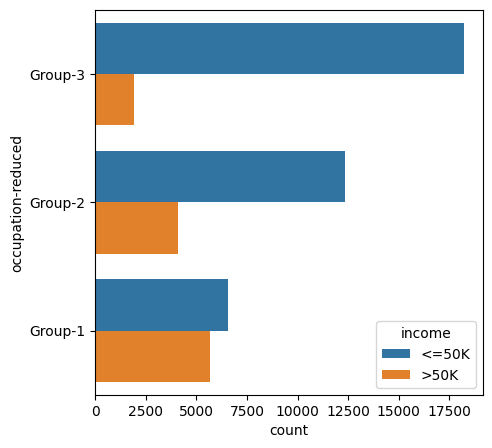

In [34]:
sns.countplot(data=adults, y='occupation-reduced', hue='income', order=adults['occupation-reduced'].value_counts().index)

Finally, here are the selected features that seem to have a significant impact on the target feature,  
categorical features:

- occupation-reduced
- family-reduced
- race-reduced
- sex

numerical features:

- age
- education-num
- hours-per-week

What is left to do is to encode the categorical features using one-hot encoding, and scale the numerical features.

In order to compare between the features, we will have two feature sets, one with the features that we selected, and the other with all the features.

The features we selected are going to be the categories with the grouped classes, but we'll see later on if we can reduce the complexity even with the selected features.

In [143]:
# create feature sets and target dataframes
original_features = ['age', 'sex', 'race', 'marital-status', 'relationship', 'education-num', 'workclass', 'occupation','hours-per-week', 'capital-gain', 'capital-loss']

selected_features = ['age', 'sex', 'race-reduced', 'marital-status-reduced', 'education-num', 'occupation-reduced', 'hours-per-week', 'capital-gain', 'capital-loss']

# create feature sets and target dataframes on both feature sets
original_X = adults[original_features]
X = adults[selected_features]

y = adults['income'].apply(lambda x: 1 if x=='>50K' else 0)

In [144]:
# one hot encoding
original_X = pd.get_dummies(original_X)
X = pd.get_dummies(X)

In [145]:
# train test split
from sklearn.model_selection import train_test_split

original_X_train, original_X_test, y_train, y_test = train_test_split(original_X, y, test_size=0.25, stratify=y ,random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y ,random_state=42)

As for scaling, we won't be using it right now, we'll see if it's necessary depending on the model we try to work with.

## Build Model

After we have explored our datasets, and saw the impact that each feature has on the target feature, we can start building our model. We will try to use the following classifiers:

- K-Nearest Neighbors
- Logistic Regression
- Support Vector Machine
- Decision Tree
- Random Forest

For each model, we are going to evaluate the performance using the following metrics:

- Accuracy
- Precision
- Recall
- F1 Score

In [117]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

The first models require the data to be scaled.

In [130]:
# perform scaling
from sklearn.preprocessing import StandardScaler

# initialize scaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()

# fit scaler to training data
scaler1.fit(original_X_train)
scaler2.fit(X_train)

# transform training and test data
original_X_train = scaler1.transform(original_X_train)
original_X_test = scaler1.transform(original_X_test)
X_train = scaler2.transform(X_train)
X_test = scaler2.transform(X_test)

### K-Nearest Neighbors

The first model we try is the KNN model.  
While using this model, we are going to compare between the original and selected feature sets, and see if there is any difference in the results.

The results of the KNN model are as follows:

- The first remark is that the performance on the train set using the original feature set is the same as using the selected one, however, the data has a better generalizability on the test set using the selected feature set. While this being said, we will only be using our selected features for the rest of the models.

- The second remark is that the accuracy between the train and test sets isn't very close, we might even think of reducing the number of selected features, regardless of working on the hyperparameters.

In [103]:
from sklearn.neighbors import KNeighborsClassifier

# initialize model
original_knn = KNeighborsClassifier()
knn = KNeighborsClassifier()

# fit model
original_knn.fit(original_X_train, y_train)
knn.fit(X_train, y_train)

# using original features

print('Original Features')

# evaluate model on train data
print('Train Accuracy: ', original_knn.score(original_X_train, y_train))

# evaluate model on test data
print('Test Accuracy: ', original_knn.score(original_X_test, y_test))

# using selected features

print('Selected Features')

# evaluate model on train data
print('Train Accuracy: ', knn.score(X_train, y_train))

# evaluate model on test data
print('Test Accuracy: ', knn.score(X_test, y_test))

Original Features
Train Accuracy:  0.8791733777401655
Test Accuracy:  0.8297436737367947
Selected Features
Train Accuracy:  0.8764161502552483
Test Accuracy:  0.8379330112193923


The confusion matrix and the classification report of the model tell us the following:

- The model has a high precision and recall for the class with income lower than 50k, but a low precision and recall for the class with income higher than 50k.

- The predictive power of the model with selected feature is so much better in terms of all the metrics.

In [104]:
original_y_pred_knn = original_knn.predict(original_X_test)
y_pred_knn = knn.predict(X_test)
# confusion matrix
print('Original Features')
print(confusion_matrix(y_test, original_y_pred_knn))
print('Selected Features')
print(confusion_matrix(y_test, y_pred_knn))

Original Features
[[8447  842]
 [1237 1685]]
Selected Features
[[8492  797]
 [1182 1740]]


In [105]:
# classification report
print('Original Features')
print(classification_report(y_test, original_y_pred_knn))
print('Selected Features')
print(classification_report(y_test, y_pred_knn))

Original Features
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9289
           1       0.67      0.58      0.62      2922

    accuracy                           0.83     12211
   macro avg       0.77      0.74      0.75     12211
weighted avg       0.82      0.83      0.83     12211

Selected Features
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      9289
           1       0.69      0.60      0.64      2922

    accuracy                           0.84     12211
   macro avg       0.78      0.75      0.77     12211
weighted avg       0.83      0.84      0.83     12211



### Logistic Regression

The next model we try is the logistic regression. We see that the accuracy for both the training set and test set is identical, which is a good sign, but we need to explore other metrics, and see what parameters we need to tune.  
One more thing is that the model is so much faster to train than the KNN model.

In [106]:
from sklearn.linear_model import LogisticRegression

# initialize model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

# evaluate model on train data
print('Train Accuracy: ', logreg.score(X_train, y_train))

# evaluate model on test data
print('Test Accuracy: ', logreg.score(X_test, y_test))

Train Accuracy:  0.8456498594086975
Test Accuracy:  0.846204242076816


Let's explore the other metrics for the model, such as the precision and recall.  
Same thing here, the model does good at predicting the true negatives, but it doesn't do well at predicting the true positives.  
In terms of precision and recall, we notice how the KNN model performed better than the logistic regression model.

In [107]:
y_pred_logreg = logreg.predict(X_test)
# confusion matrix
print(confusion_matrix(y_test, y_pred_logreg))

[[8675  614]
 [1264 1658]]


In [108]:
# classification report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9289
           1       0.73      0.57      0.64      2922

    accuracy                           0.85     12211
   macro avg       0.80      0.75      0.77     12211
weighted avg       0.84      0.85      0.84     12211



### Support Vector Machine

Let's explore the SVM model. Here are our remarks:

- The first thing is that the model is so much slower than the previous ones.

- The second thing is that regardless of the time it took to train the model, the metrics are not significantly better than the previous models.

In [109]:
from sklearn.svm import SVC

# initialize model
svc = SVC()

# fit model
svc.fit(X_train, y_train)

# evaluate model on train data
print('Train Accuracy: ', svc.score(X_train, y_train))

# evaluate model on test data
print('Test Accuracy: ', svc.score(X_test, y_test))

Train Accuracy:  0.8536485490431601
Test Accuracy:  0.8525100319384162


When analyzing the confusion matrix and the classification report, we see that the model is the worst at predicting the true positives.

In [110]:
y_pred_svc = svc.predict(X_test)
# confusion matrix
print(confusion_matrix(y_test, y_pred_svc))

[[8792  497]
 [1304 1618]]


In [111]:
# classification report
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      9289
           1       0.77      0.55      0.64      2922

    accuracy                           0.85     12211
   macro avg       0.82      0.75      0.77     12211
weighted avg       0.85      0.85      0.84     12211



### Decision Trees

The decision tree model is known for overfitting, which is shown here when using the dafault parameters of the model, see the huge gap between the train and test accuracy.

In [112]:
from sklearn.tree import DecisionTreeClassifier

# initialize model
dt = DecisionTreeClassifier()

# fit model
dt.fit(X_train, y_train)

# evaluate model on train data
print('Train Accuracy: ', dt.score(X_train, y_train))

# evaluate model on test data
print('Test Accuracy: ', dt.score(X_test, y_test))

Train Accuracy:  0.9371024542054543
Test Accuracy:  0.8307263942347064


### Hyperparameter Tuning

Before we start tuning the hyperparameters, let's see if we can reduce the complexity of the model by reducing the number of features.  
We will work with the KNN model to do this, since it is the one that performed the best, and didn't overfit.  
The only two features that we can manage to ommit are capital-gain and capital-loss, since they have a low correlation with the target feature.

After running our model without the two features, our recall and precision scores dropped significantly, however, since we saw that earlier that capital gain was actually a good indicator of the income, we tried including it again, and we saw that the recall and precision scores were similar to the ones we had before, so we can conclude that capital gain is a good indicator of the income.

In [136]:
X.columns

Index(['age', 'education-num', 'hours-per-week', 'capital-gain',
       'capital-loss', 'sex_Female', 'sex_Male', 'race-reduced_Non-White',
       'race-reduced_White', 'marital-status-reduced_Married',
       'marital-status-reduced_Unmarried', 'occupation-reduced_Group-1',
       'occupation-reduced_Group-2', 'occupation-reduced_Group-3'],
      dtype='object')

In [138]:
X_train[0:2]

array([[-1.58092637, -0.80230622, -0.84451987, -0.14448121, -0.21707658,
        -0.70383734,  0.70383734, -0.4117914 ,  0.4117914 , -0.94663226,
         0.94663226, -0.57988259, -0.70965638,  1.19115312],
       [ 2.14277391, -1.57812763, -1.65180176, -0.14448121, -0.21707658,
        -0.70383734,  0.70383734, -0.4117914 ,  0.4117914 , -0.94663226,
         0.94663226, -0.57988259,  1.40913268, -0.83952263]])

In [142]:
# drop capital loss
new_X_train, new_X_test = X_train[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]], X_test[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13]]

# initialize model
knn2 = KNeighborsClassifier()

# fit model
knn2.fit(new_X_train, y_train)

# predict on test data
y_pred_knn2 = knn2.predict(new_X_test)

# evaluate model on train data
print('Train Accuracy: ', accuracy_score(y_train, knn2.predict(new_X_train)))

# evaluate model on test data
print('Test Accuracy: ', accuracy_score(y_test, y_pred_knn2))

# print classification report
print(classification_report(y_test, y_pred_knn2))

Train Accuracy:  0.8764161502552483
Test Accuracy:  0.8379330112193923
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      9289
           1       0.69      0.60      0.64      2922

    accuracy                           0.84     12211
   macro avg       0.78      0.75      0.77     12211
weighted avg       0.83      0.84      0.83     12211



Now that we have decided on the features to use, let's start tuning the hyperparameters of the model.

In [114]:
X.drop(['capital-loss'], axis=1, inplace=True)

# train test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y ,random_state=42)

#### KNN

The only parameter we are going to explore is the number of neighbors.  
Since we care more about the precision and recall than the acuracy, we will use the F1 score as the metric to evaluate the model.

When plotting the F1 score for different values of k, we see that the best value for k could be 7, we will try using it and see if we don't get the overfitting problem.

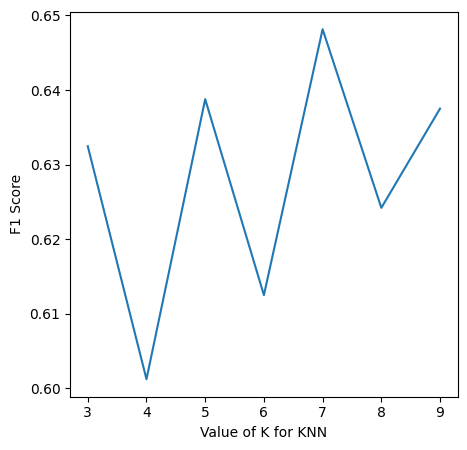

In [120]:
# list of parameter values
k_range = list(range(3, 10, 1))
f1_scores = []

# use each k value to train model
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred))

# plot the relationship between k and f1 score
plt.plot(k_range, f1_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('F1 Score')
plt.show()

In [116]:
# build the new model with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

# print classification report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      9289
           1       0.69      0.60      0.64      2922

    accuracy                           0.84     12211
   macro avg       0.78      0.76      0.77     12211
weighted avg       0.83      0.84      0.83     12211

